In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays

# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import hist
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_400mm",
    #"2Mu2E_100GeV_5GeV_0p4mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10mm",
    "2Mu2E_200GeV_1p2GeV_48mm",
    "2Mu2E_200GeV_5GeV_200mm",
    #"2Mu2E_500GeV_5GeV_80mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
    #"2Mu2E_100GeV_p25GeV_400mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
channels = [
        #"baseNoLj",
        #"baseNoLj_A_ee_matched_lj",
        #"baseNoLj_A_mumu_matched_lj"
        #"baseNoLj_A_ee_highPtA_lowLxyA",
        #"baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
        #"baseNoLj_A_mumu_highPtA_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_lj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_highPtA_lowLxyA",
        #"baseNoLj_A_mumu_matched_pfMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_dsaMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_2dsaMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_1dsa1pfMuLj_highPT_LxyUpto400A",
        #"baseNoLj_A_mumu_matched_lj_highPT_lowLxyA",
        #"baseNoLj_promptA",
        #"baseNoLj_displacedA",
        #"baseNoLj_veryDisplacedA",
        #"baseNoLj_lowLxyA",
        #"baseNoLj_highPtA",
        #"baseNoLj_A_ee_highPtA_Lxyto5A",
        #"baseNoLj_A_ee_matched_lj_highPT_Lxy0to5A",
        #"baseNoLj_A_ee_highPtA_Lxy40to77A",
        #"baseNoLj_A_ee_highPtA_Lxy40to77A",
        #"baseNoLj_A_ee_matched_lj_highPT_Lxy40to77A",
        #"baseNoLj_A_ee_highPtA_Lxy125to135A",
        #"baseNoLj_A_ee_matched_lj_highPT_Lxy125to135A",
        #"baseNoLj_Lxy_upto250A",
        #"2mu2e",
        #"baseNoLj_A_mumu_matched_2dsaMuLj_highPT_LxyUpto400A_genMu0_pT50to60",
        #"baseNoLj_A_mumu_highPtA_LxyUpto400A_genMu0_pT50to60",
        
    
        "baseNoLj_A_mumu_highPtA_LxyUpto400A_genMu_pT",
        "baseNoLj_A_mumu_matched_2dsaMuLj_highPT_LxyUpto400A_genMu_pT",
        "baseNoLj_A_mumu_matched_pfMuLj_highPT_LxyUpto400A_genMu_pT",
        "baseNoLj_A_mumu_matched_1dsa1pfMuLj_highPT_LxyUpto400A_genMu_pT"
        
    ]

In [4]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    maxchunks=1,
    )

p = sidm_processor.SidmProcessor(
    channels,
    ["gen_base", 
    #"lepton_genLepton_base",
    #"lepton_genA_base",
    # "lj_base",
    # "dsaMuon_base"
    ]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)


Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj_A_mumu_highPtA_LxyUpto400A_genMu_pT

Not applying any cuts to the lepton jets for channel  baseNoLj_A_mumu_highPtA_LxyUpto400A_genMu_pT

Not applying any cuts to the lepton jets for channel  baseNoLj_A_mumu_highPtA_LxyUpto400A_genMu_pT

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1abafe0820>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

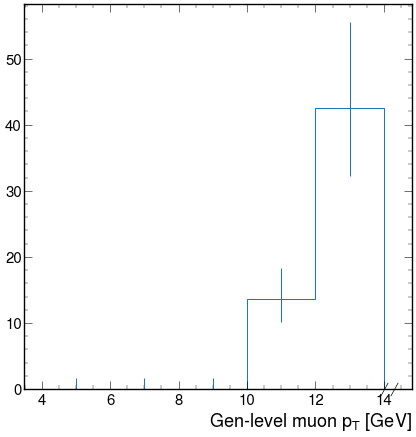

In [5]:
output["out"][samples[0]]["hists"]["genMu_pt"][channels[0],5j:15j].plot()

In [6]:
ch1 = "baseNoLj_A_mumu_highPtA_LxyUpto400A_genMu_pT"
ch2 = "baseNoLj_A_mumu_matched_2dsaMuLj_highPT_LxyUpto400A_genMu_pT"
ch3 = "baseNoLj_A_mumu_matched_pfMuLj_highPT_LxyUpto400A_genMu_pT"
ch4 = "baseNoLj_A_mumu_matched_1dsa1pfMuLj_highPT_LxyUpto400A_genMu_pT"

In [7]:
histograms = {"2Mu2E_200GeV_0p25GeV_10mm":
              ["genAs_toMu_lxy_MuMudR_XXLowRange",
              "genAs_toMu_pt_MuMudR_XXLowRange",
              "genAs_toMu_lxy_pt_lowRange",
               "genMu0_pt_MuMudR_XXLowRange",
               "genMu1_pt_MuMudR_XXLowRange",
              
              ],
               "2Mu2E_200GeV_1p2GeV_48mm":
              ["genAs_toMu_lxy_MuMudR_XLowRange",
              "genAs_toMu_pt_MuMudR_XLowRange",
              "genAs_toMu_lxy_pt_lowRange",
               "genMu0_pt_MuMudR_XLowRange",
               "genMu1_pt_MuMudR_XLowRange",
              ],
              "2Mu2E_200GeV_5GeV_200mm":
              ["genAs_toMu_lxy_MuMudR",
              "genAs_toMu_pt_MuMudR_lowRange",
              "genAs_toMu_lxy_pt_lowRange",
               "genMu0_pt_MuMudR",
               "genMu1_pt_MuMudR",
             
              ]
             } 
     
hist_x_axis = [r"$Z_d$ $L_{xy}$", 
               r"$Z_d$ $p_T$", 
               r"$Z_d$ $L_{xy}$",
               r"gen$Mu0$ $p_T$",
               r"gen$Mu1$ $p_T$",
              ]
hist_y_axis = [r"$\Delta$R($\mu$, $\mu$)", 
               r"$\Delta$R($\mu$, $\mu$)",  
               r"$Z_d$ $p_T$",
               r"$\Delta$R($\mu$, $\mu$)", 
               r"$\Delta$R($\mu$, $\mu$)",
              ]

/tmp/ipykernel_131755/1351328181.py:13: RuntimeWarning: invalid value encountered in divide
  values_ratio = values_num/(values_den)


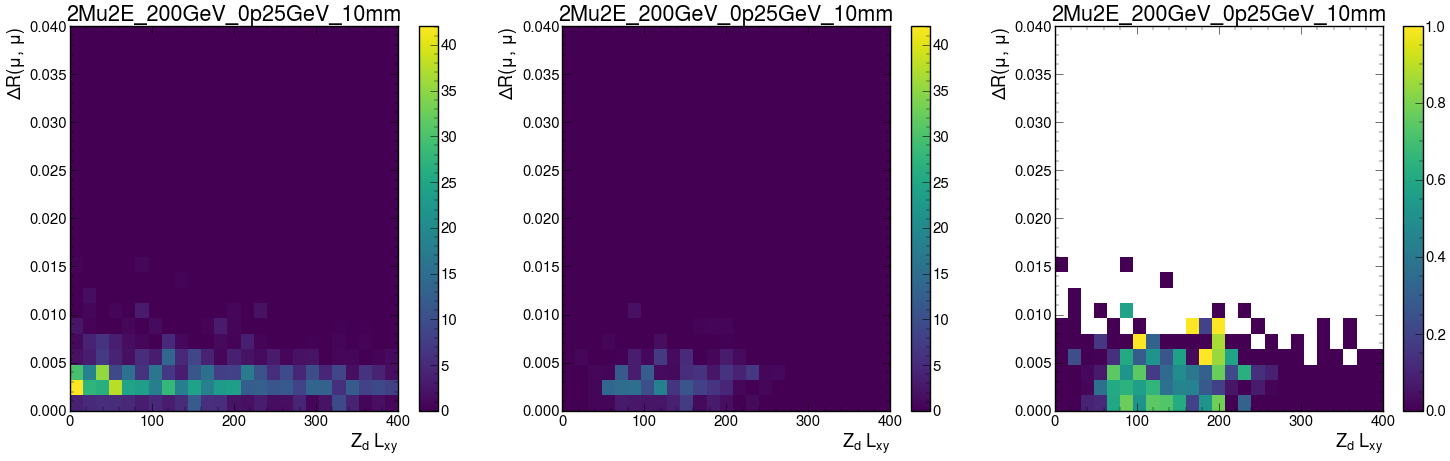

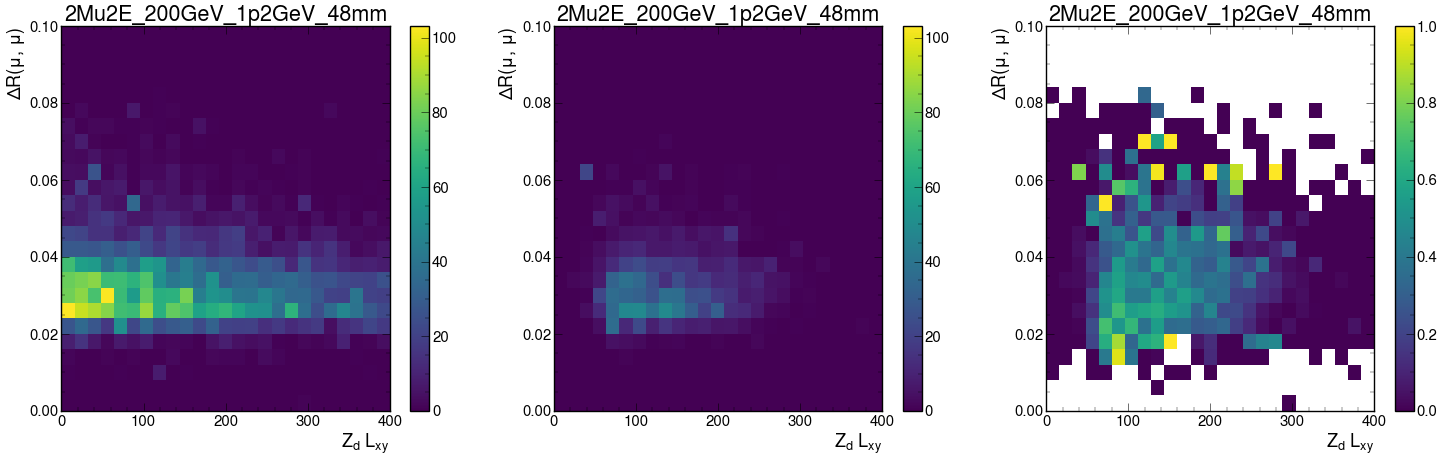

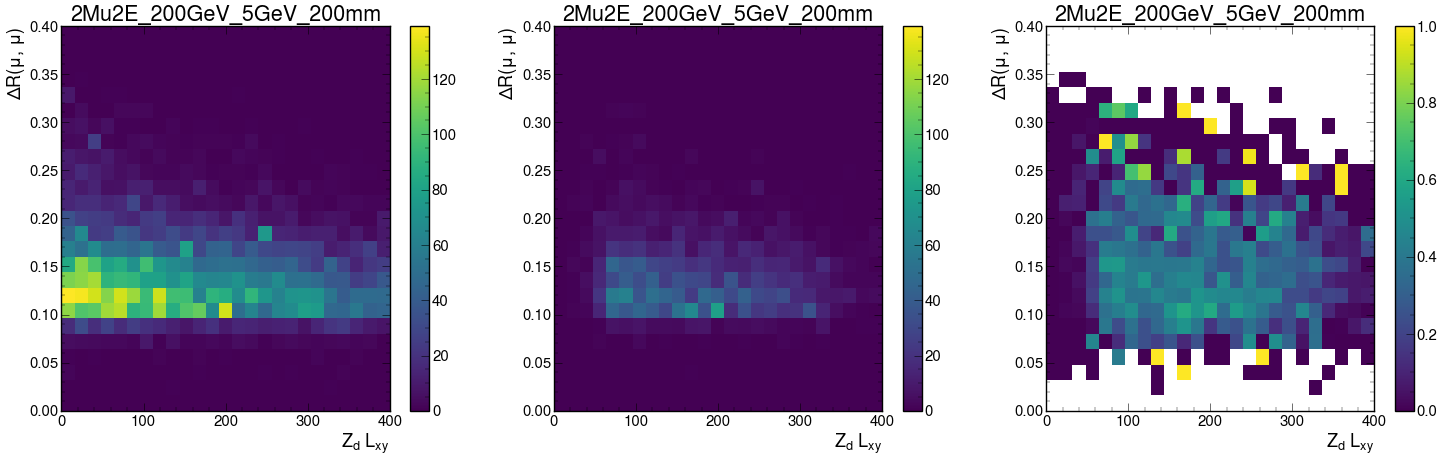

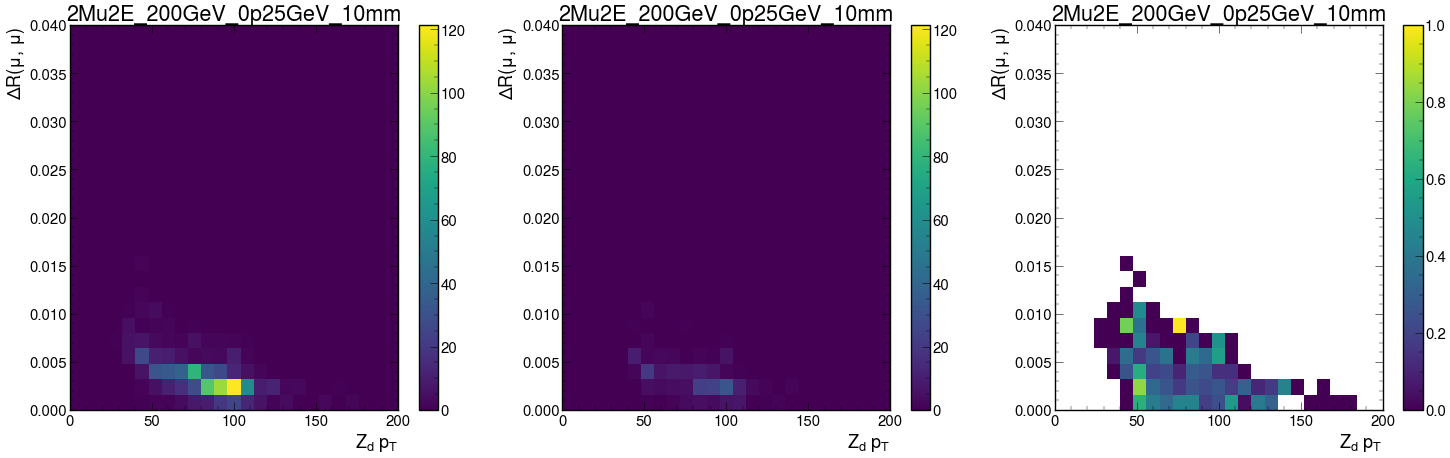

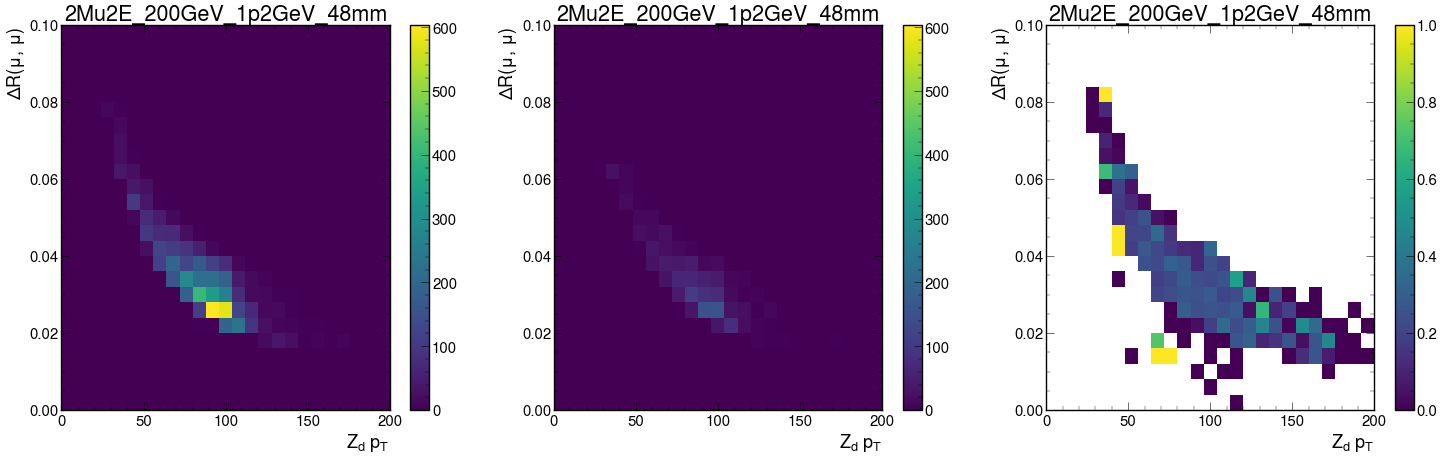

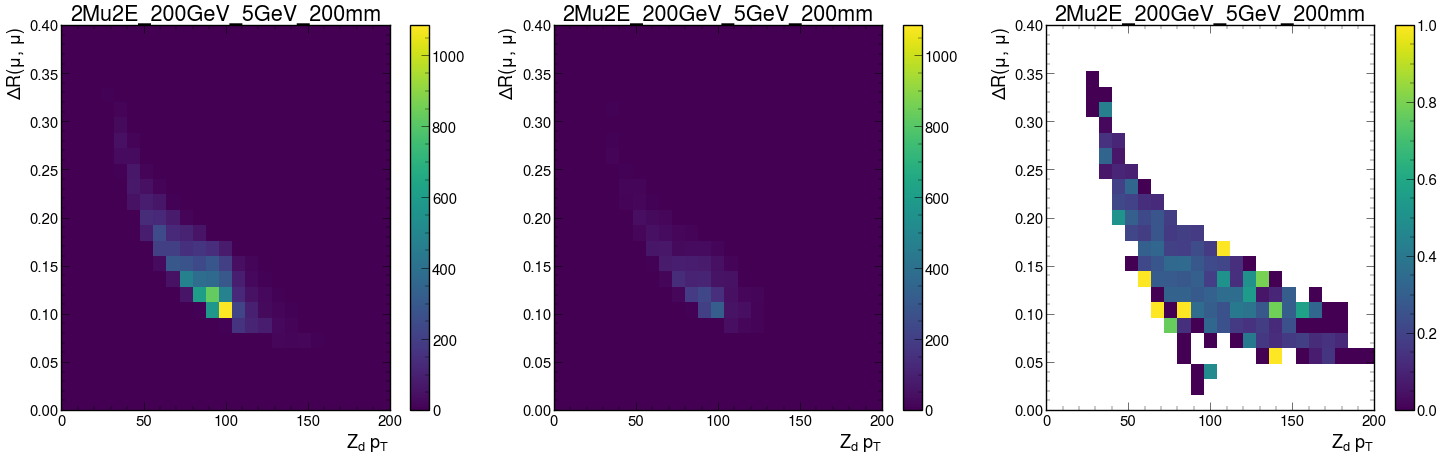

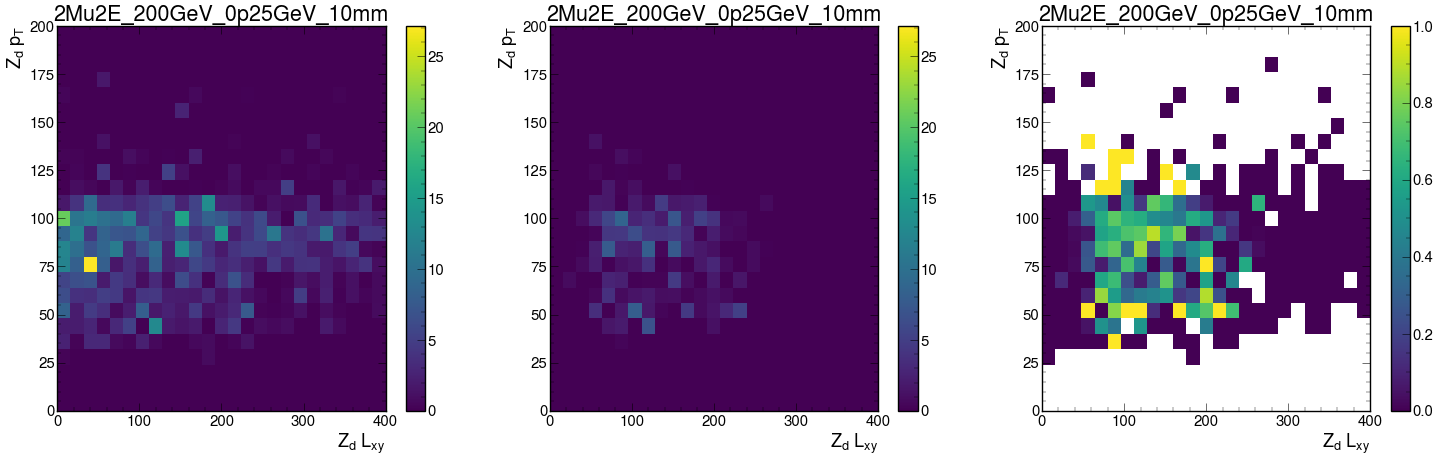

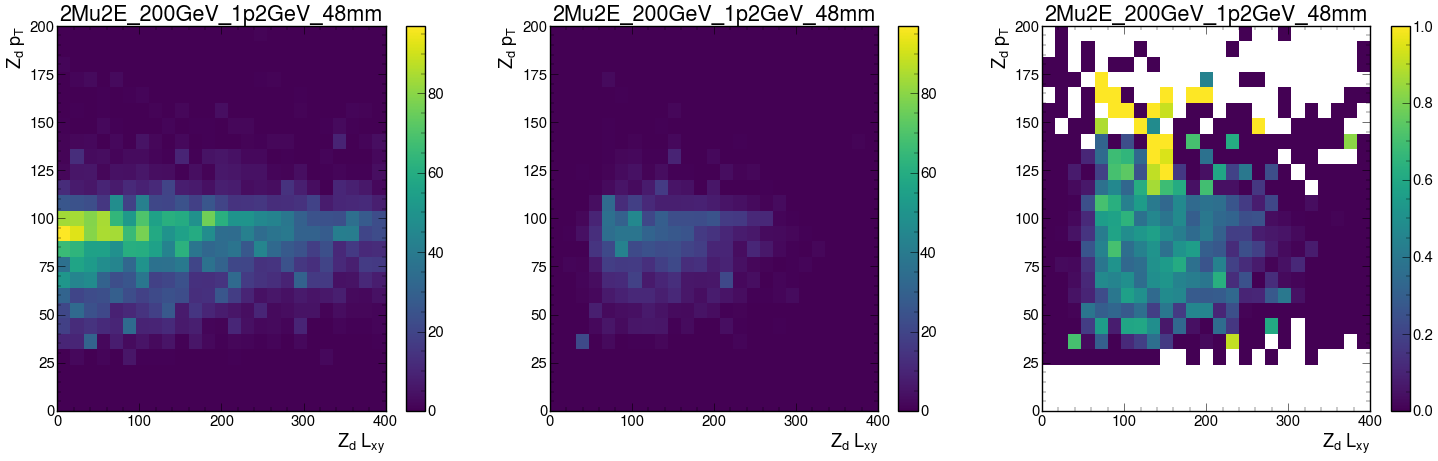

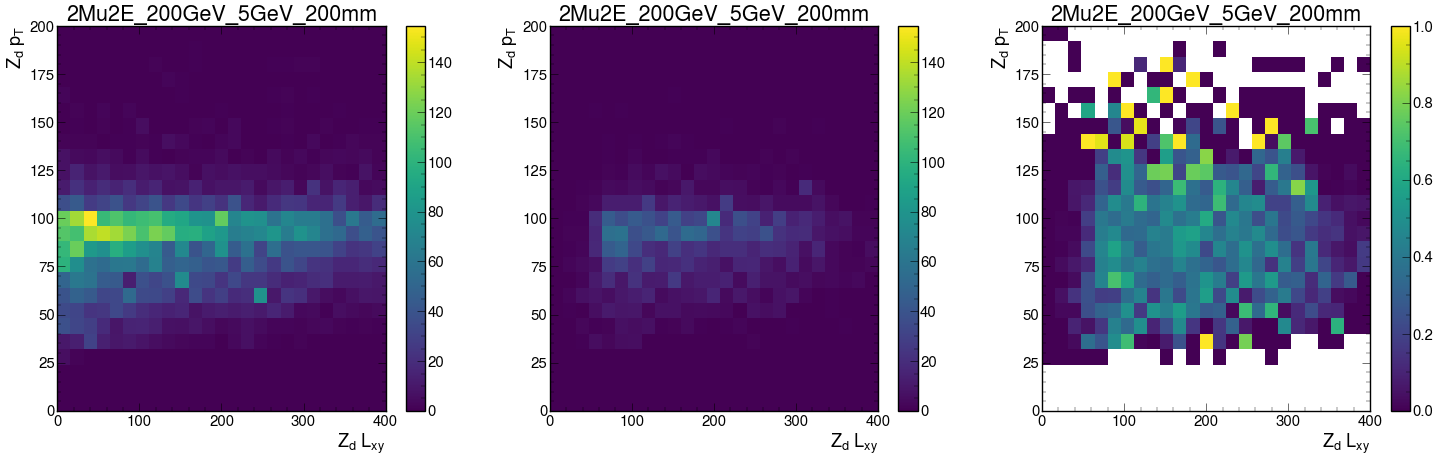

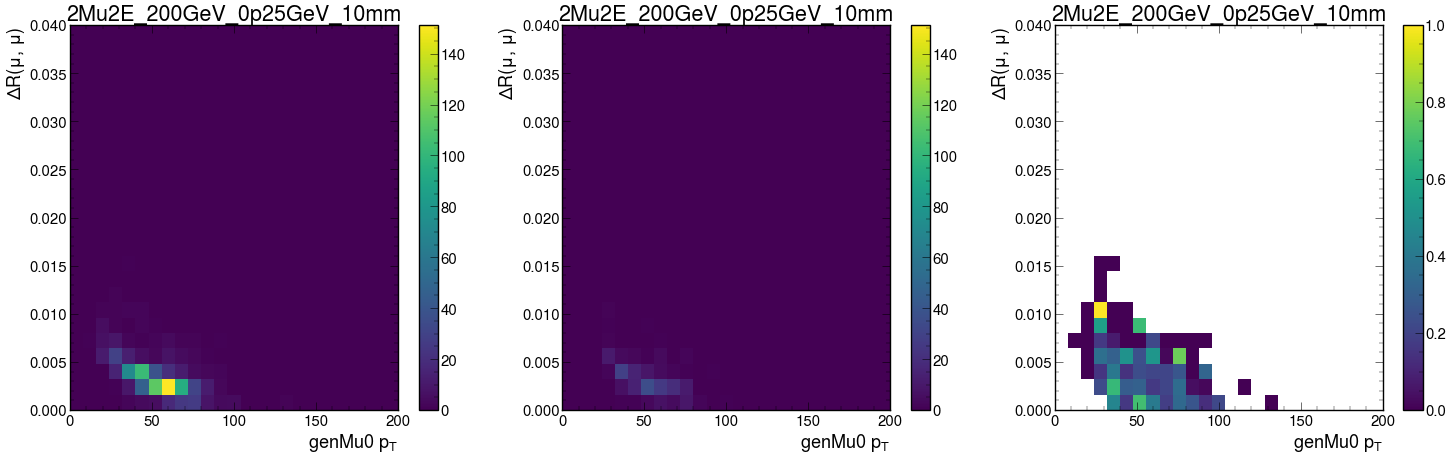

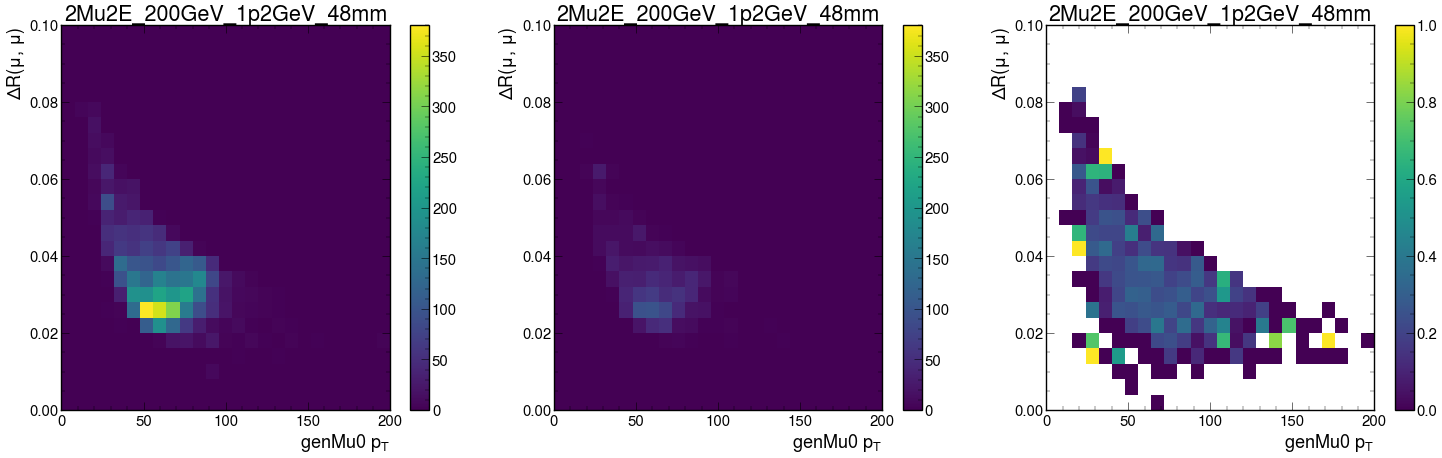

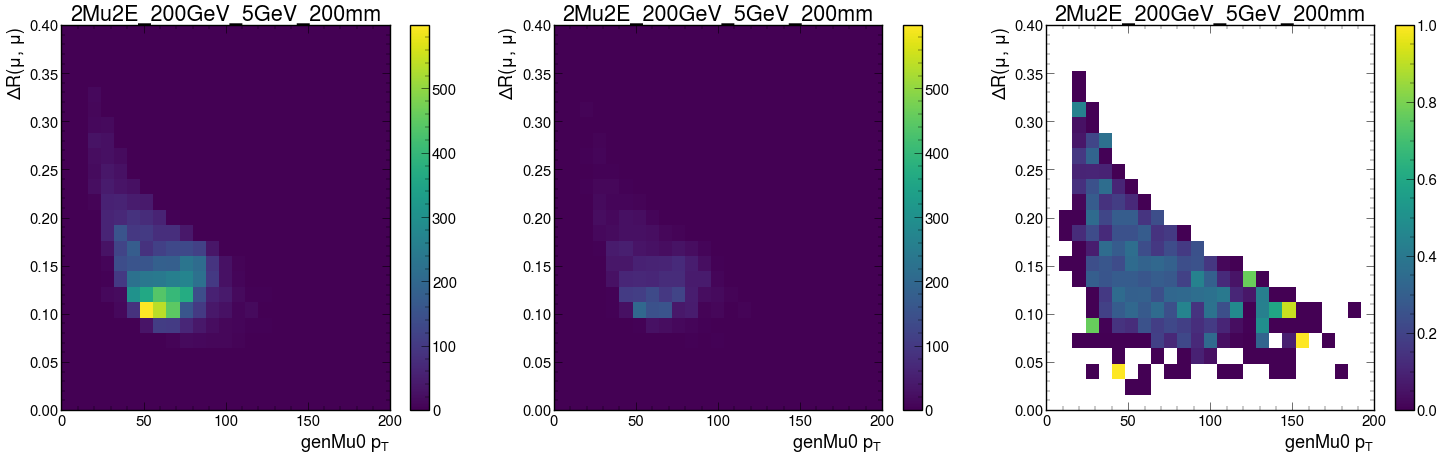

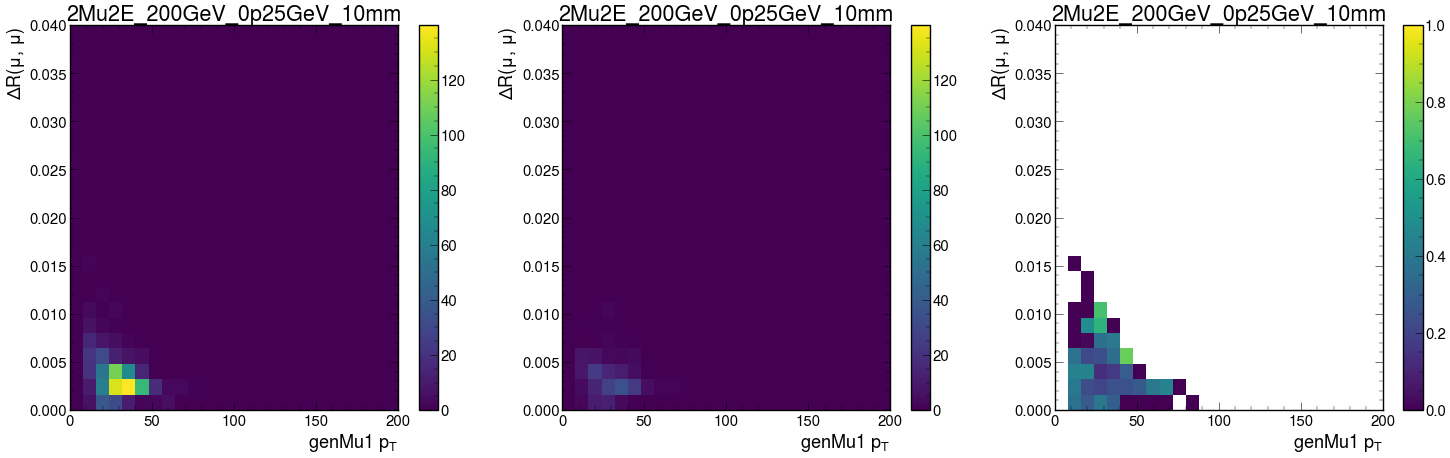

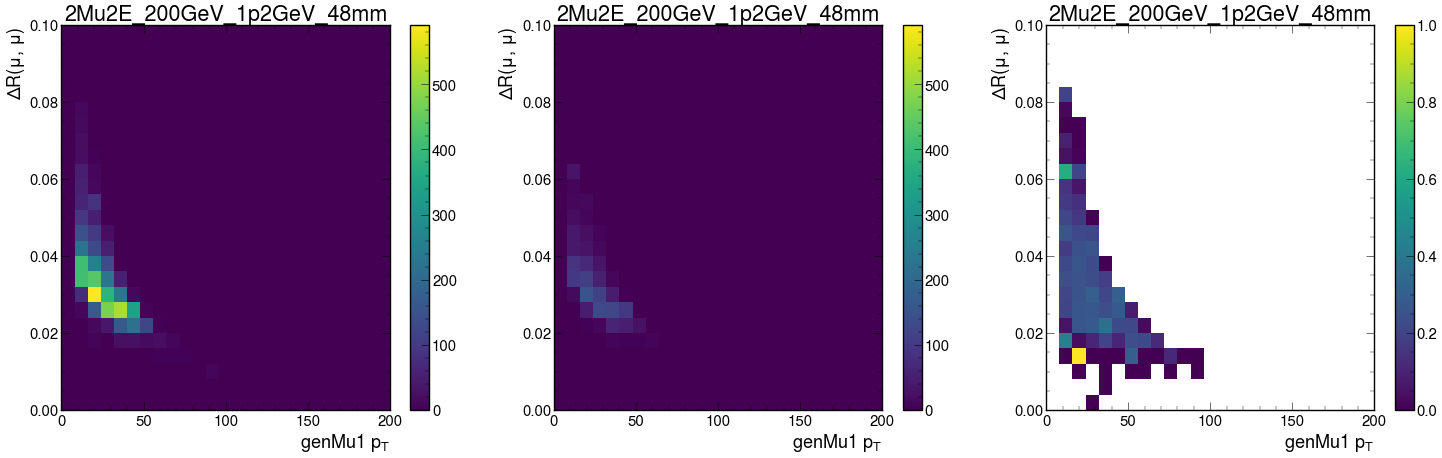

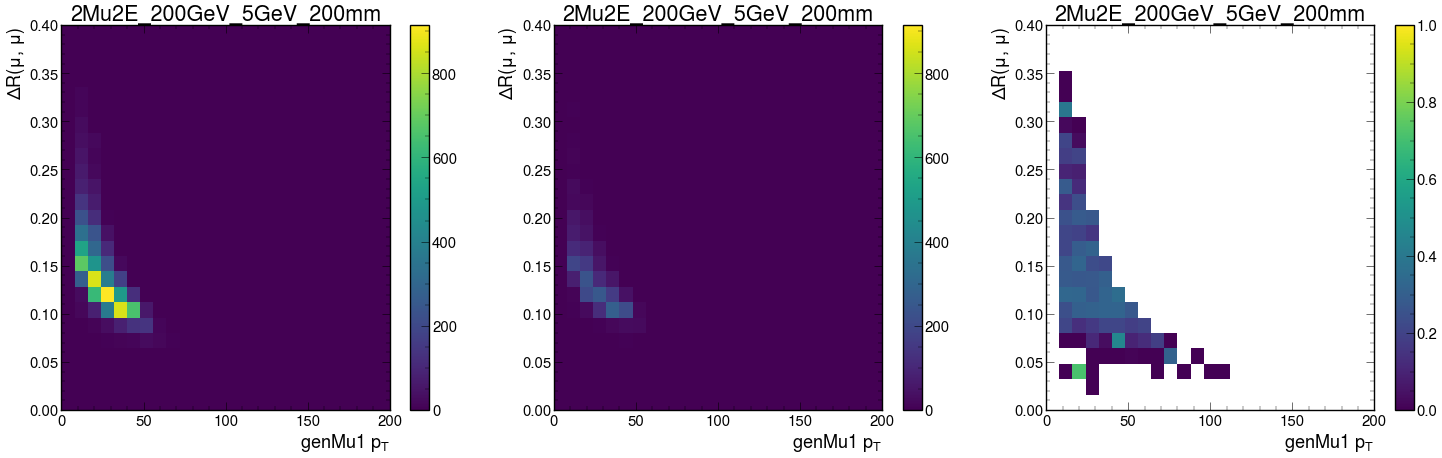

In [8]:
row = len(samples)
column = len(histograms[samples[0]])
#fig , ax = plt.subplots(row, column, figsize =(row *12, column*10)) 
for h in range(column):
    for s in range(row):
    
        
        hist2d_den = output["out"][samples[s]]["hists"][histograms[samples[s]][h]][ch1,:, :]
        hist2d_num = output["out"][samples[s]]["hists"][histograms[samples[s]][h]][ch2,:, :]
        
        values_den = hist2d_den.values()
        values_num = hist2d_num.values()
        values_ratio = values_num/(values_den)
        
        maximum = np.array(values_den).max()
        
        
        
        
        fig , ax =plt.subplots(1,3, figsize =(3*12, 10))
        plt.subplot(1, 3, 1)
        mesh_den=ax[0].pcolormesh(*hist2d_den.axes.edges.T,values_den.T, vmin=0,vmax = maximum) 
        fig.colorbar(mesh_den)
        
        plt.subplot(1, 3, 2)
        mesh_num=ax[1].pcolormesh(*hist2d_num.axes.edges.T,values_num.T, vmin=0,vmax=maximum) 
        fig.colorbar(mesh_num)
        
        
        plt.subplot(1, 3, 3)
        mesh = ax[2].pcolormesh(*hist2d_num.axes.edges.T, values_ratio.T, vmin = 0.0 , vmax = 1.0)
        fig.colorbar(mesh)
        for x in range(3):
            ax[x].set_xlabel(hist_x_axis[h])
            ax[x].set_ylabel(hist_y_axis[h])
            ax[x].set_title(samples[s])
            #ax[0].set_title(samples[s] + r"\\n$Z_d \rightarrow ee$")
            #ax[1].set_title(samples[s] + r"\\n$Z_d \rightarrow ee with $e\gamma$ LJ nearby$")
            #ax[0].text(0.5, 0.5,r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby")
            #ax[1].text(0.5, 0.5,r"$Z_d \rightarrow ee$ ")
        #plt.legend()
        
        

/tmp/ipykernel_131755/2249953330.py:13: RuntimeWarning: invalid value encountered in divide
  values_ratio = values_num/(values_den)


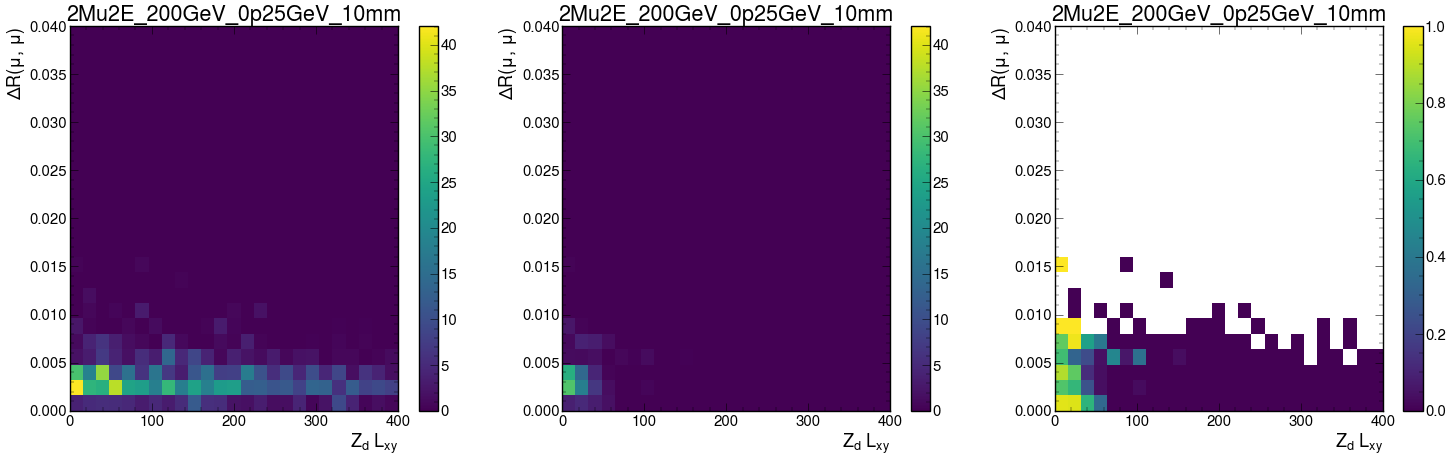

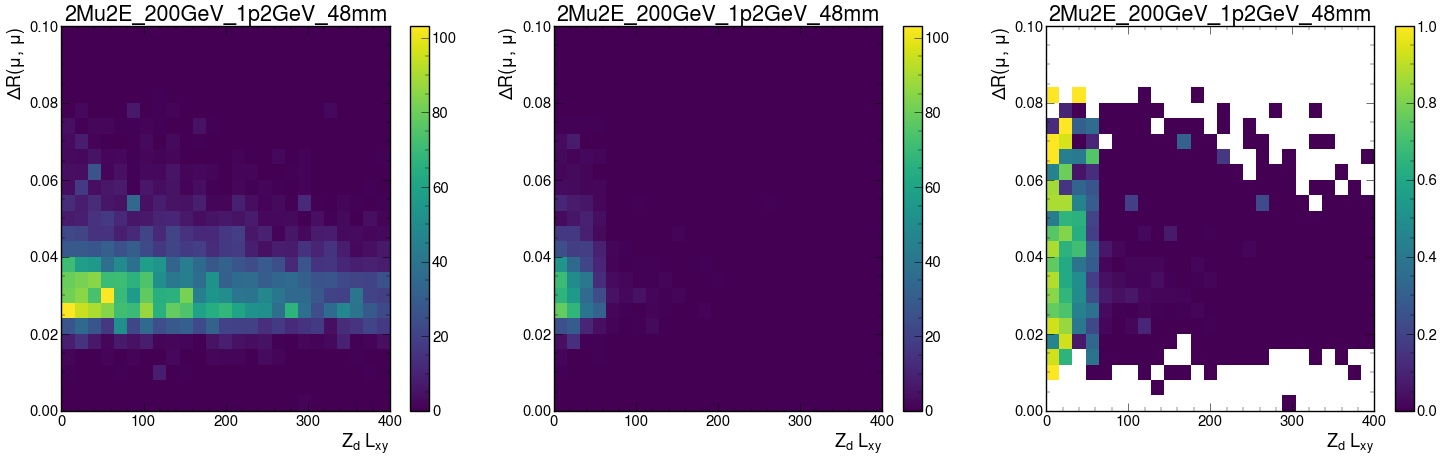

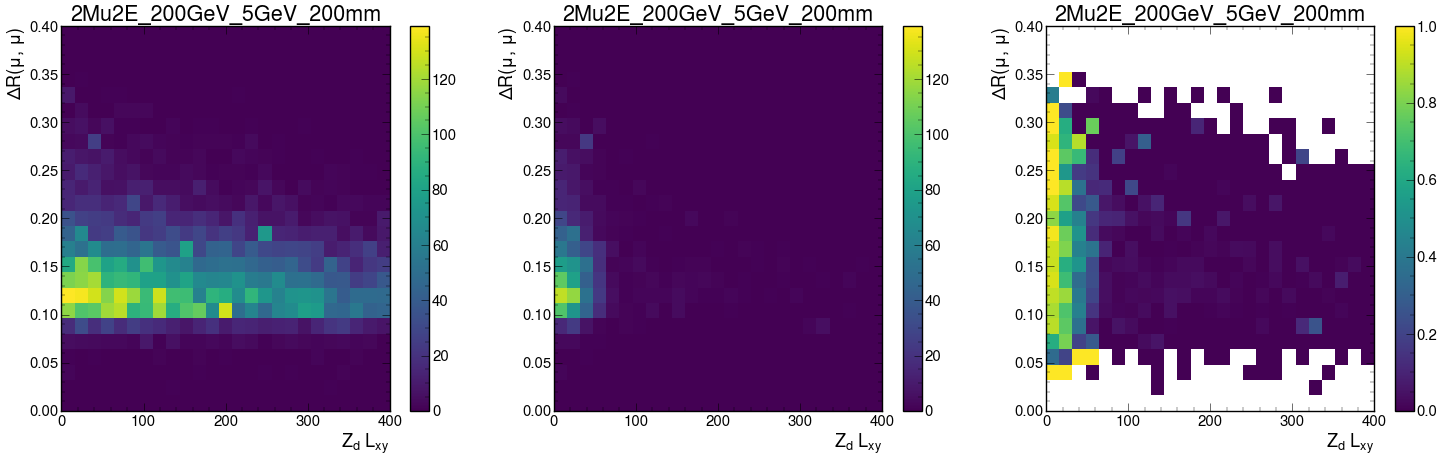

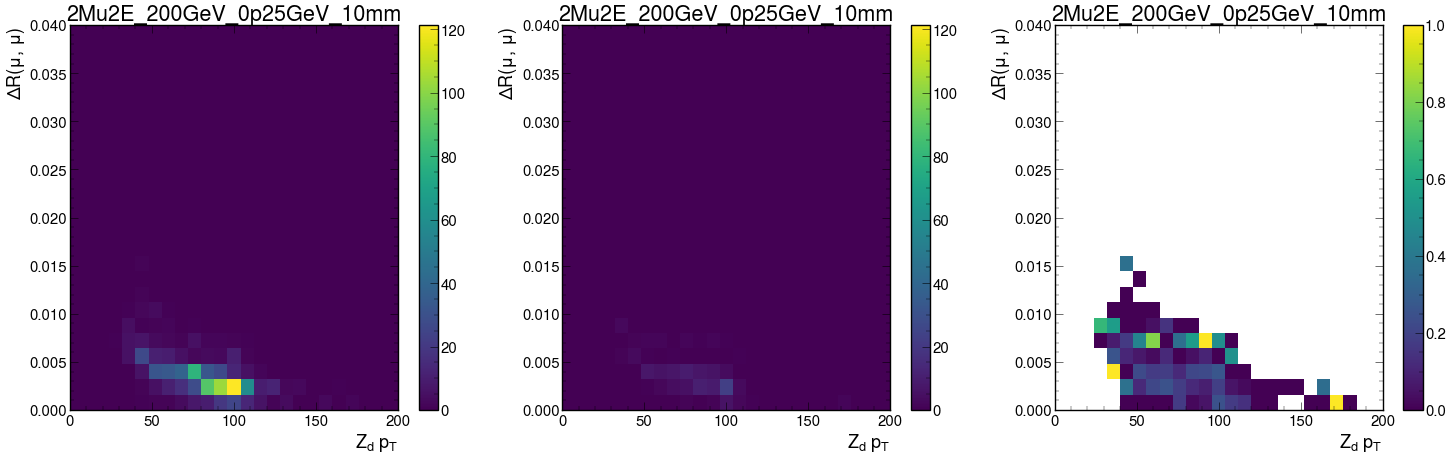

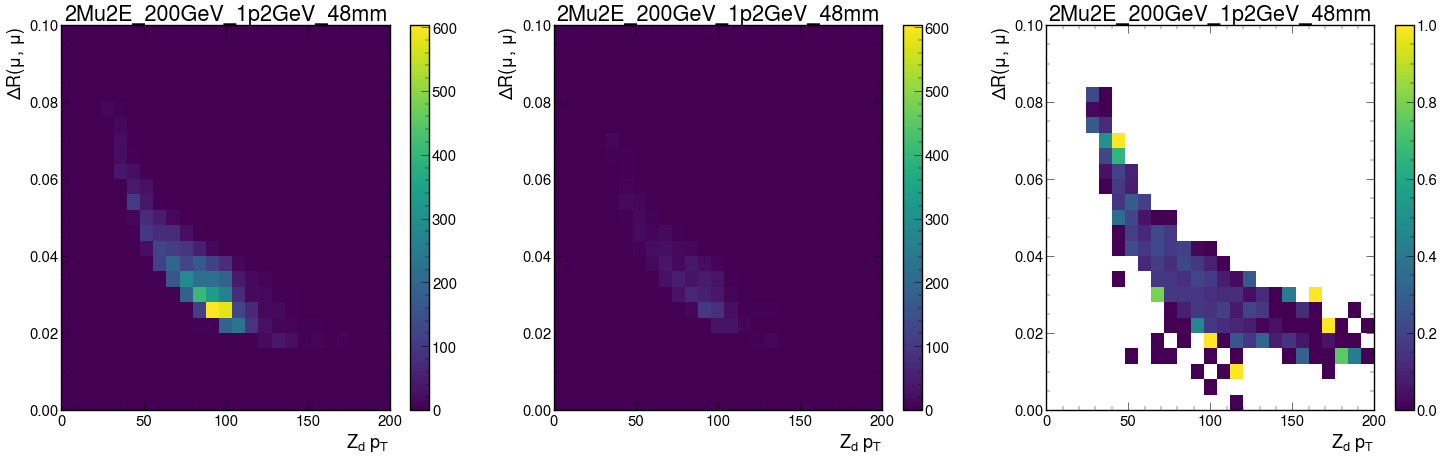

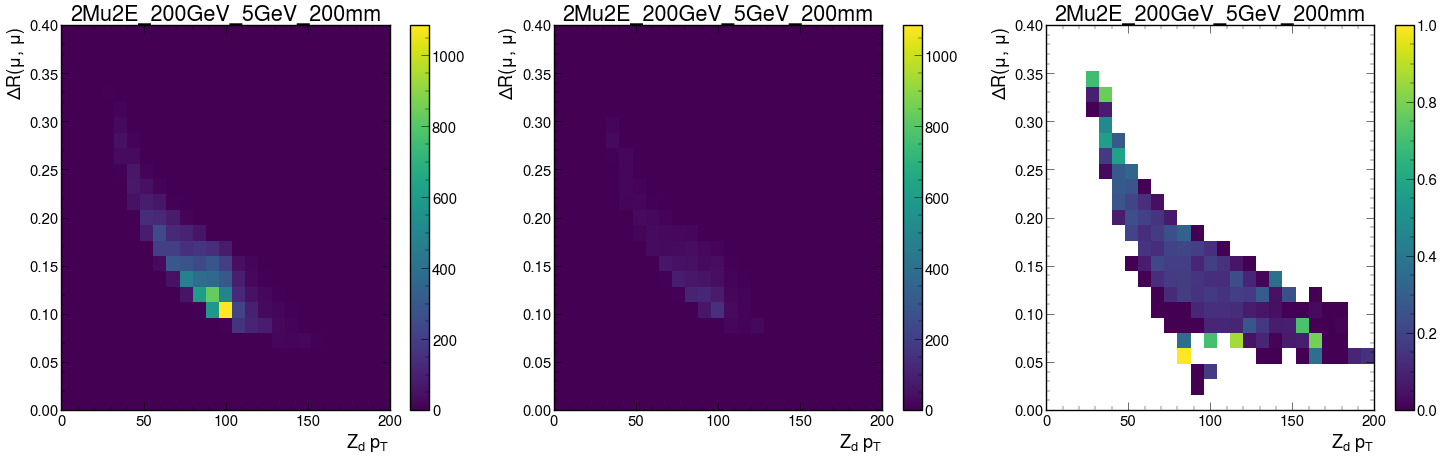

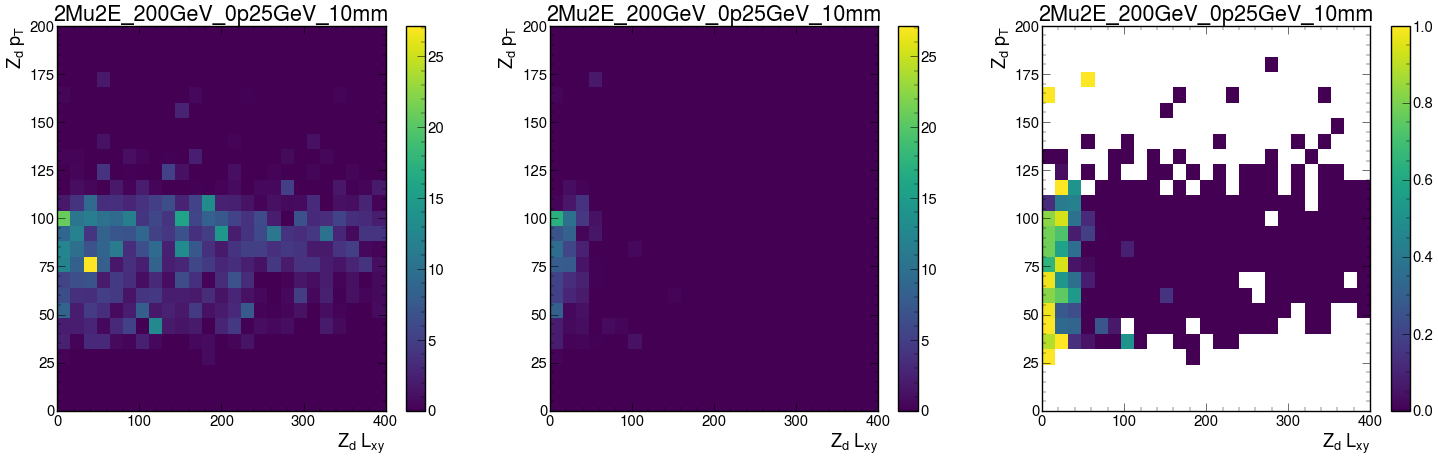

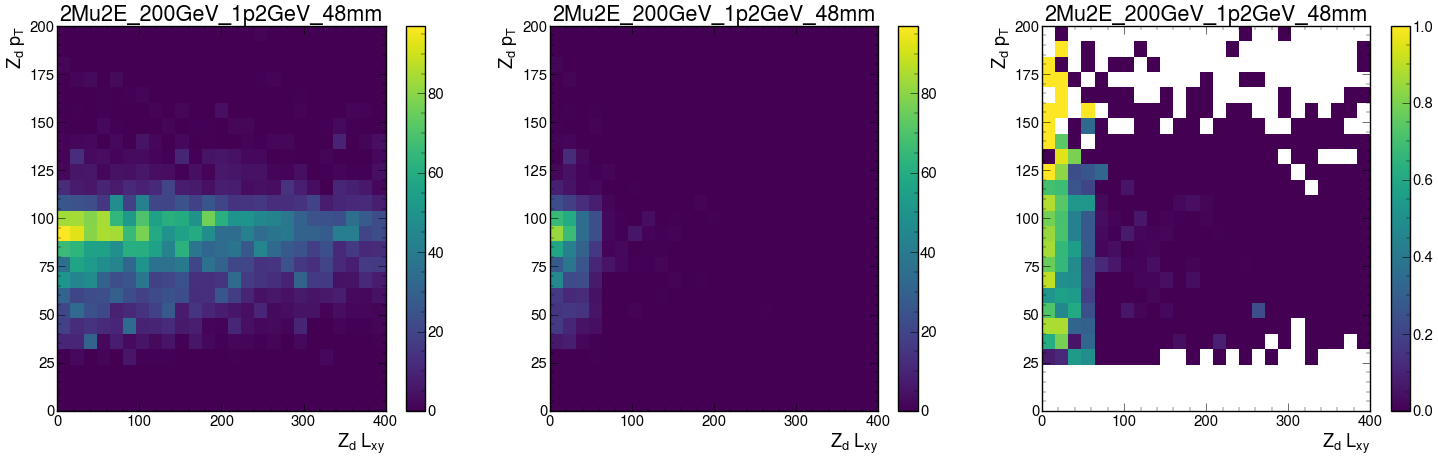

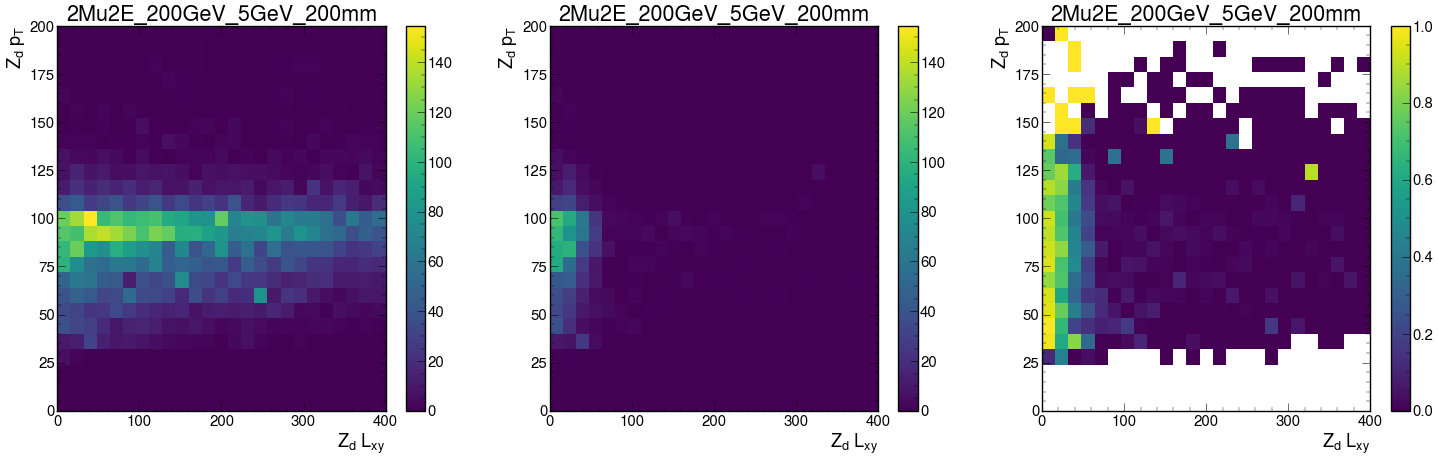

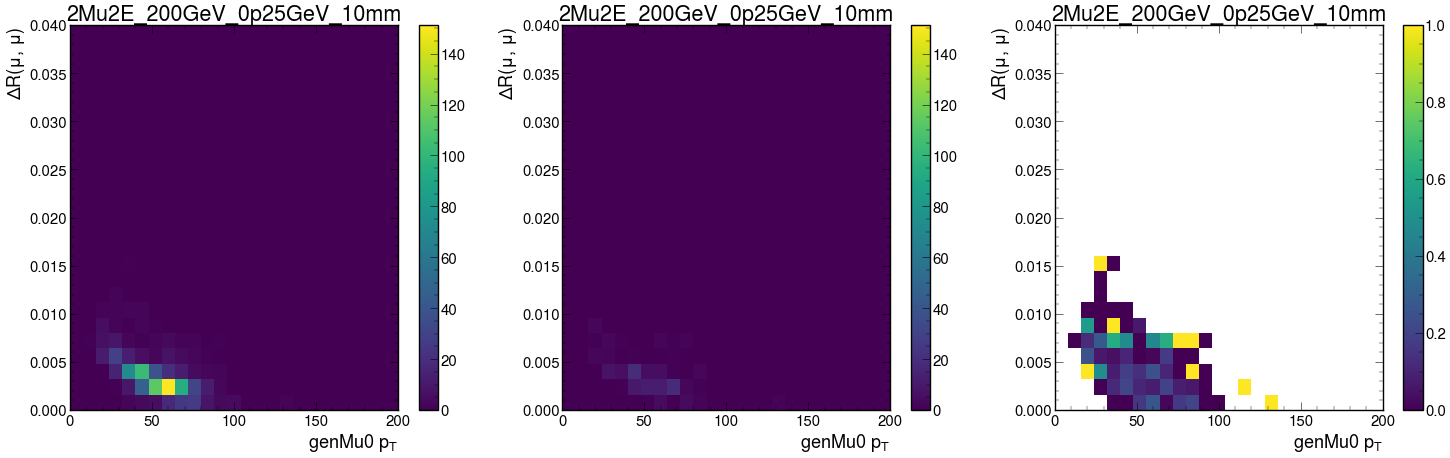

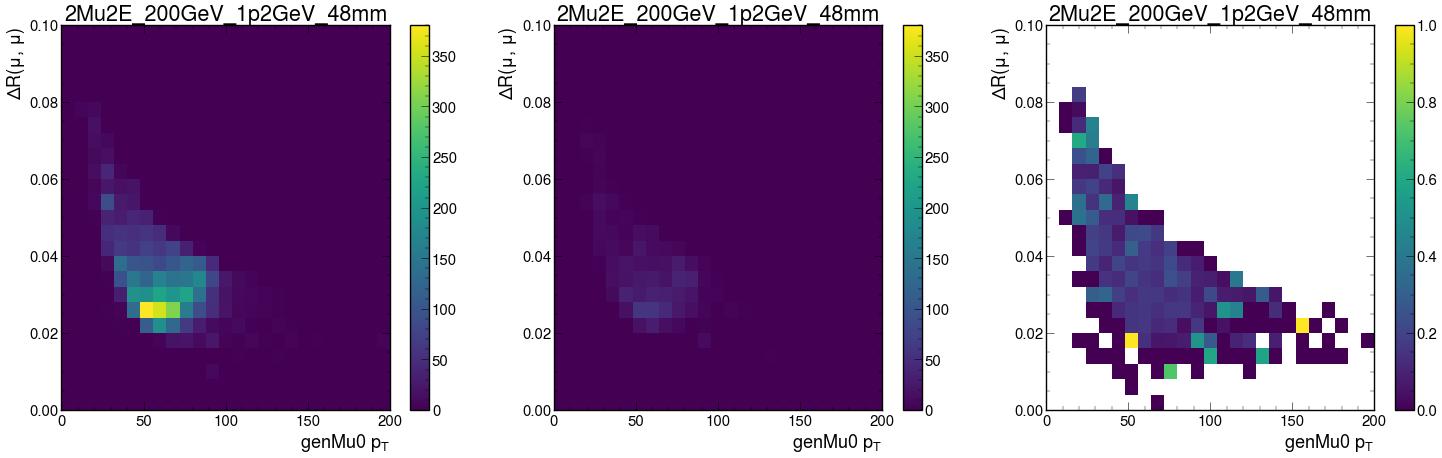

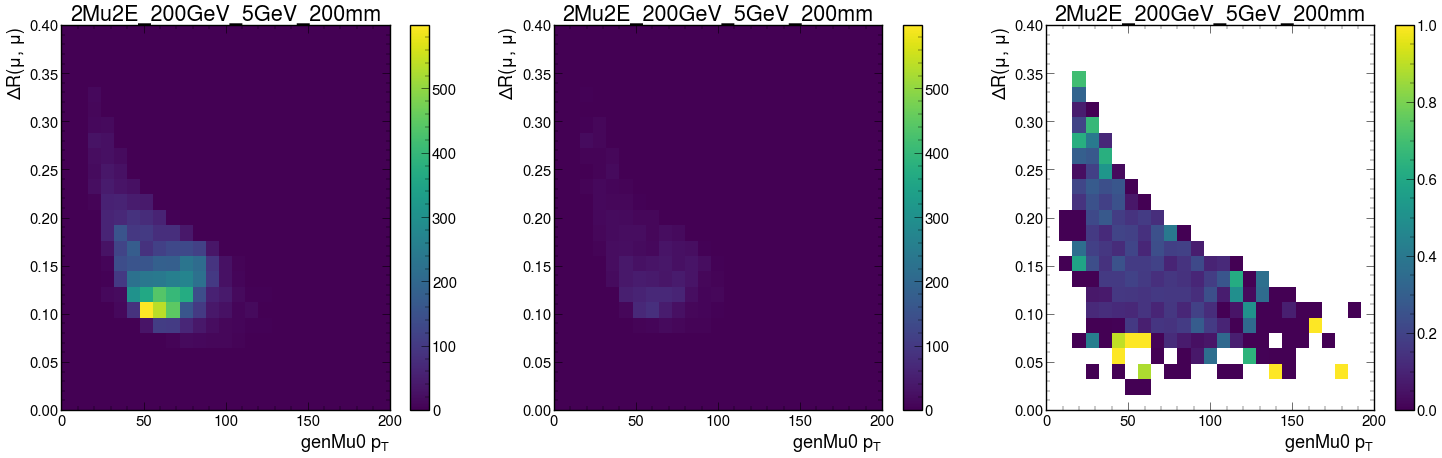

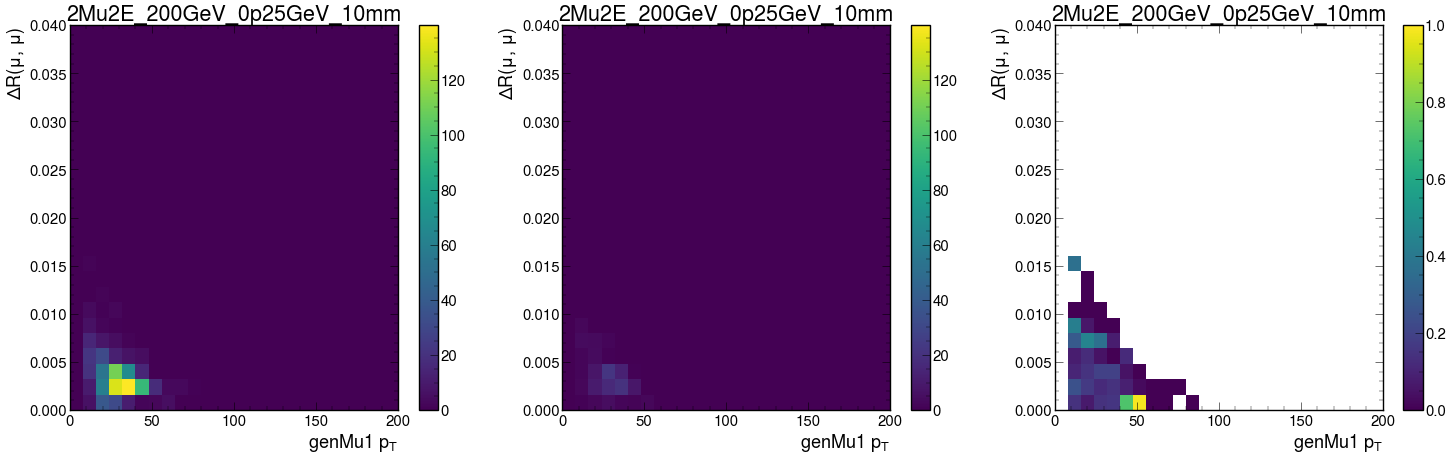

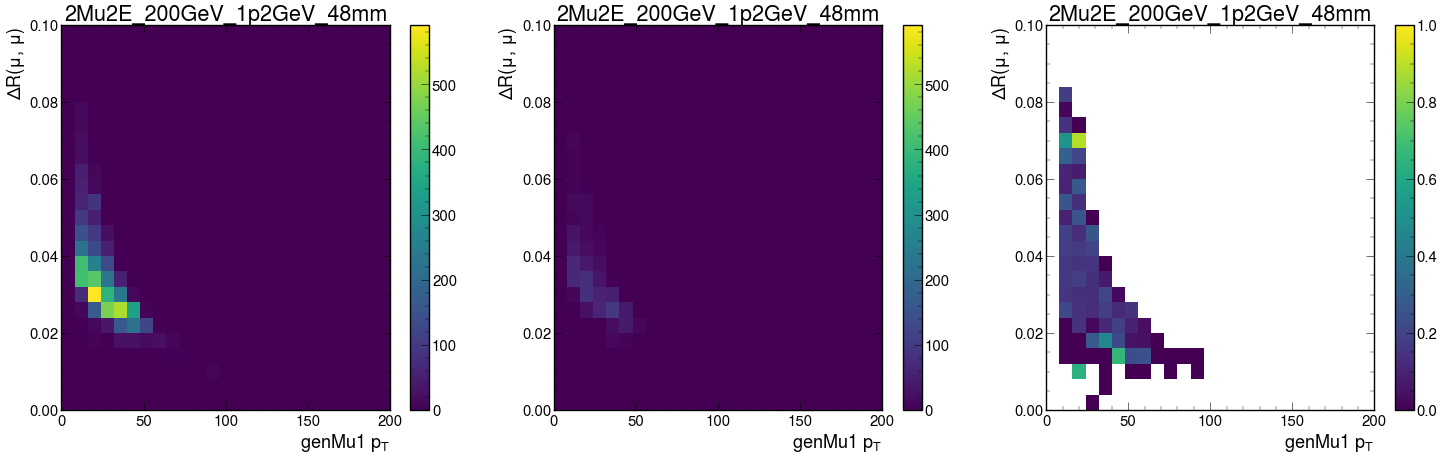

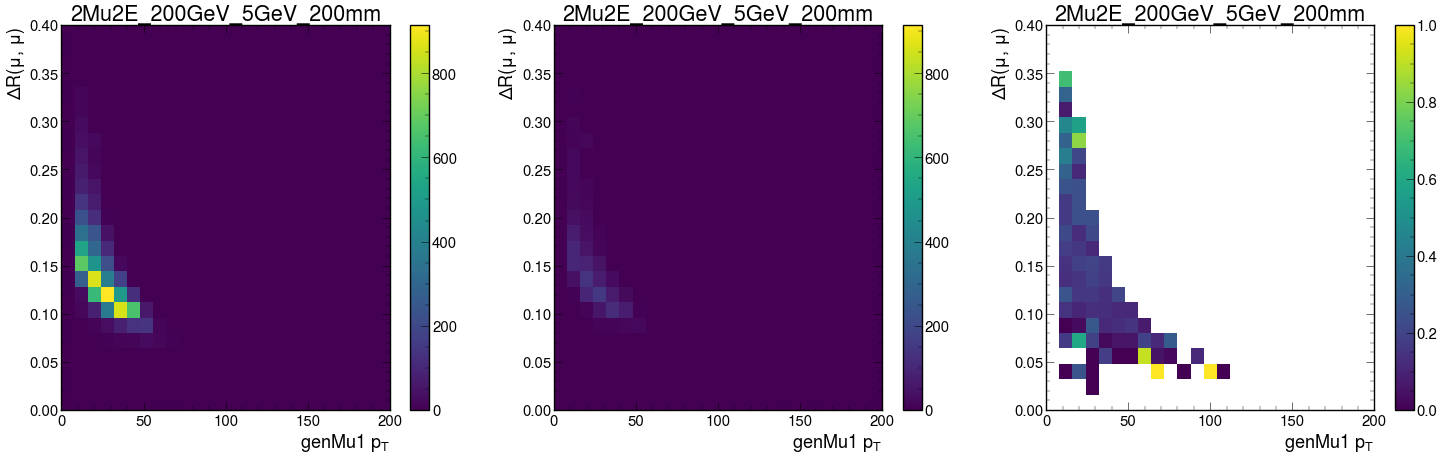

In [9]:
row = len(samples)
column = len(histograms[samples[0]])
#fig , ax = plt.subplots(row, column, figsize =(row *12, column*10)) 
for h in range(column):
    for s in range(row):
    
        
        hist2d_den = output["out"][samples[s]]["hists"][histograms[samples[s]][h]][ch1,:, :]
        hist2d_num = output["out"][samples[s]]["hists"][histograms[samples[s]][h]][ch3,:, :]
        
        values_den = hist2d_den.values()
        values_num = hist2d_num.values()
        values_ratio = values_num/(values_den)
        
        maximum = np.array(values_den).max()
        
        
        
        
        fig , ax =plt.subplots(1,3, figsize =(3*12, 10))
        plt.subplot(1, 3, 1)
        mesh_den=ax[0].pcolormesh(*hist2d_den.axes.edges.T,values_den.T, vmin=0,vmax = maximum) 
        fig.colorbar(mesh_den)
        
        plt.subplot(1, 3, 2)
        mesh_num=ax[1].pcolormesh(*hist2d_num.axes.edges.T,values_num.T, vmin=0,vmax=maximum) 
        fig.colorbar(mesh_num)
        
        
        plt.subplot(1, 3, 3)
        mesh = ax[2].pcolormesh(*hist2d_num.axes.edges.T, values_ratio.T, vmin = 0.0 , vmax = 1.0)
        fig.colorbar(mesh)
        for x in range(3):
            ax[x].set_xlabel(hist_x_axis[h])
            ax[x].set_ylabel(hist_y_axis[h])
            ax[x].set_title(samples[s])
            #ax[0].set_title(samples[s] + r"\\n$Z_d \rightarrow ee$")
            #ax[1].set_title(samples[s] + r"\\n$Z_d \rightarrow ee with $e\gamma$ LJ nearby$")
            #ax[0].text(0.5, 0.5,r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby")
            #ax[1].text(0.5, 0.5,r"$Z_d \rightarrow ee$ ")
        #plt.legend()
        
        

/tmp/ipykernel_131755/3378058726.py:13: RuntimeWarning: invalid value encountered in divide
  values_ratio = values_num/(values_den)


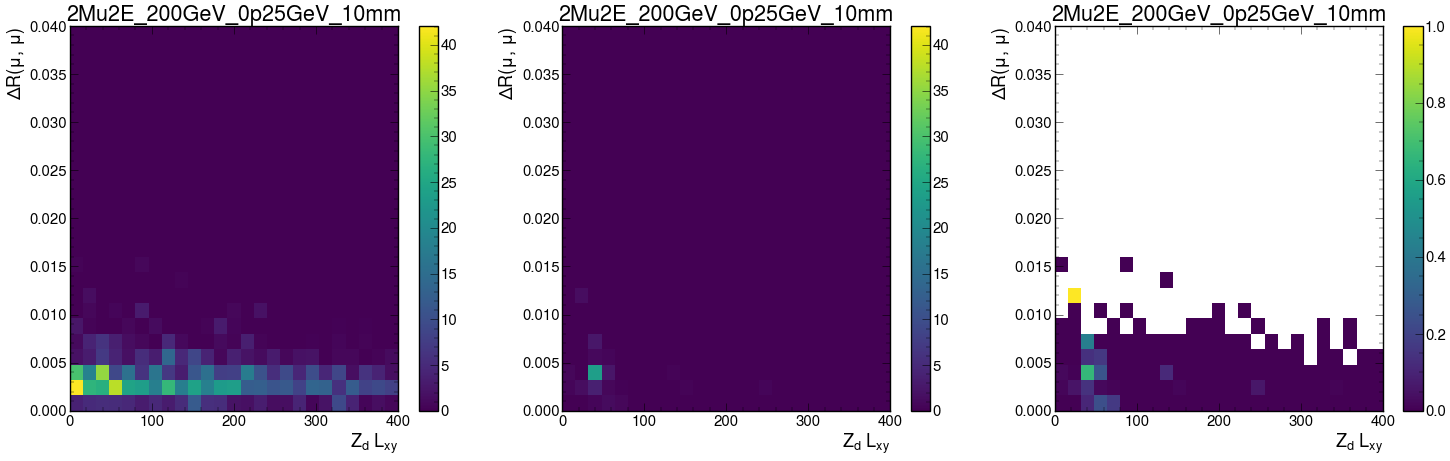

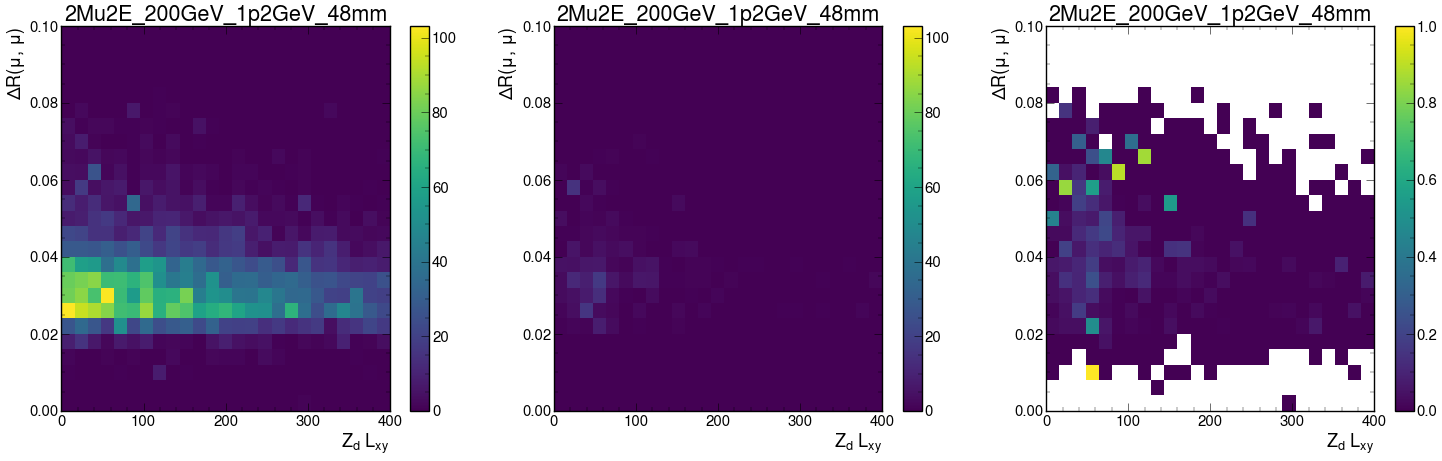

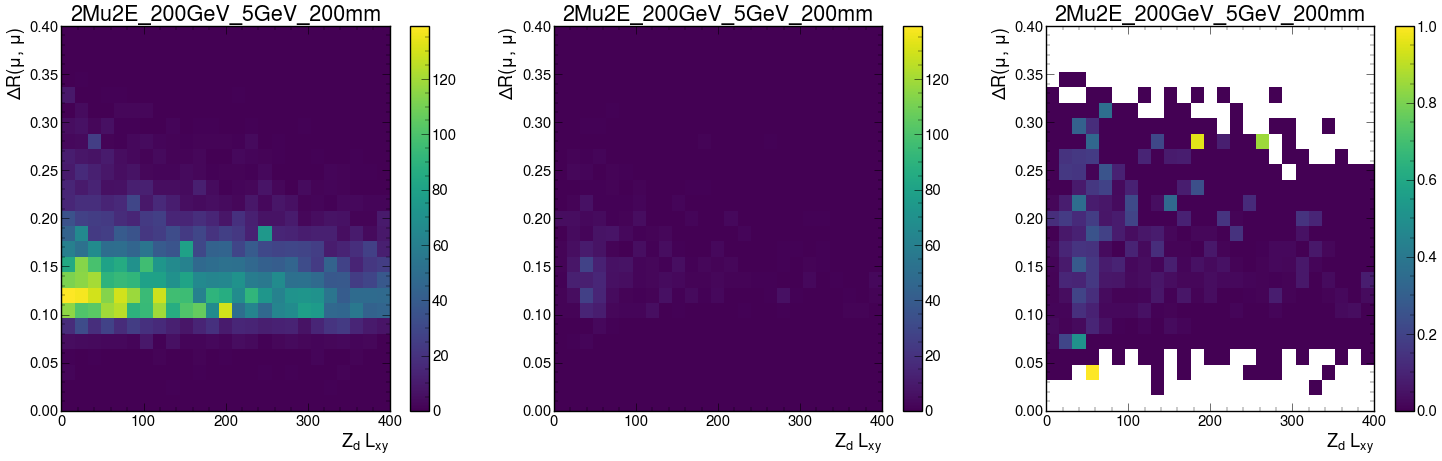

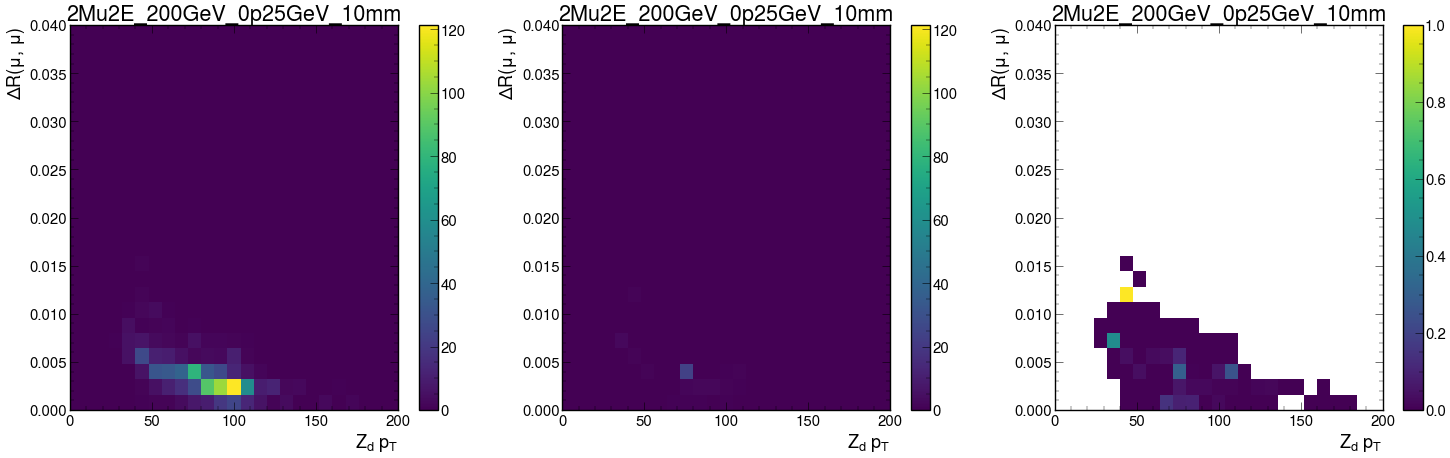

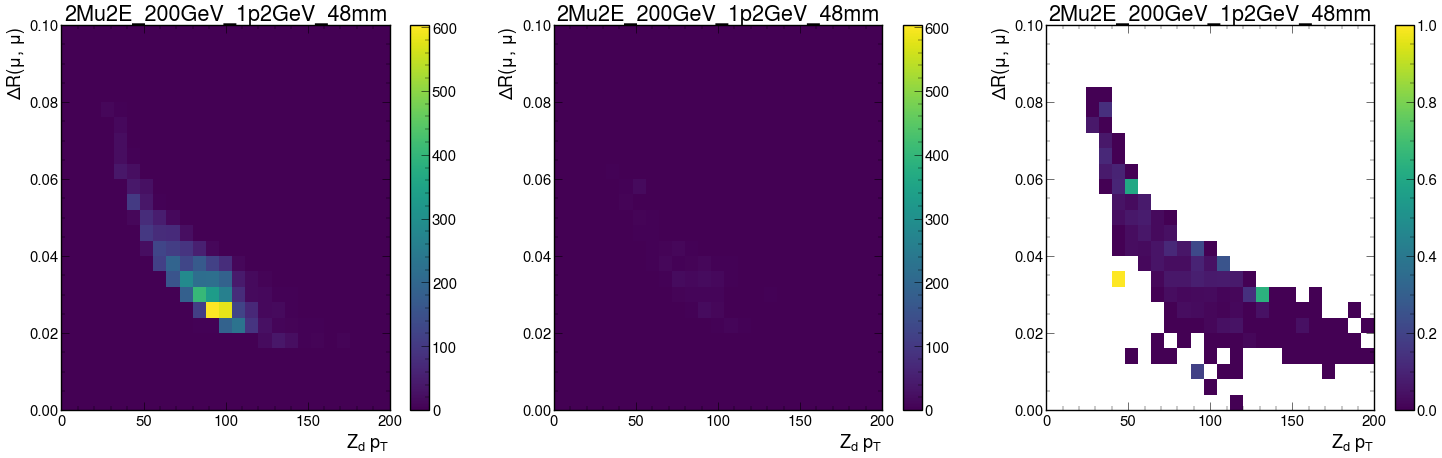

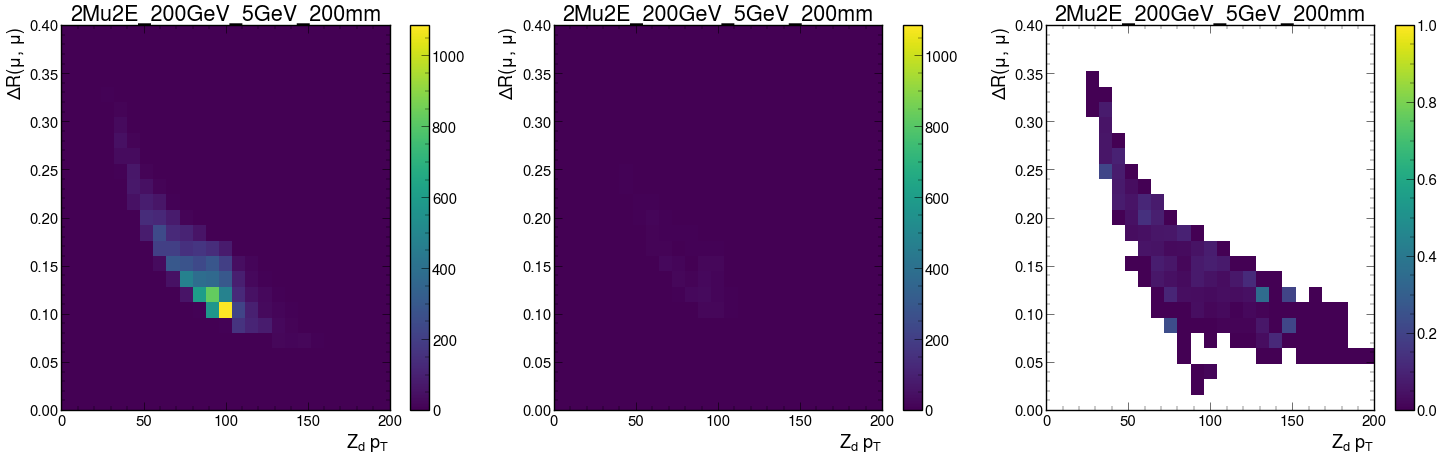

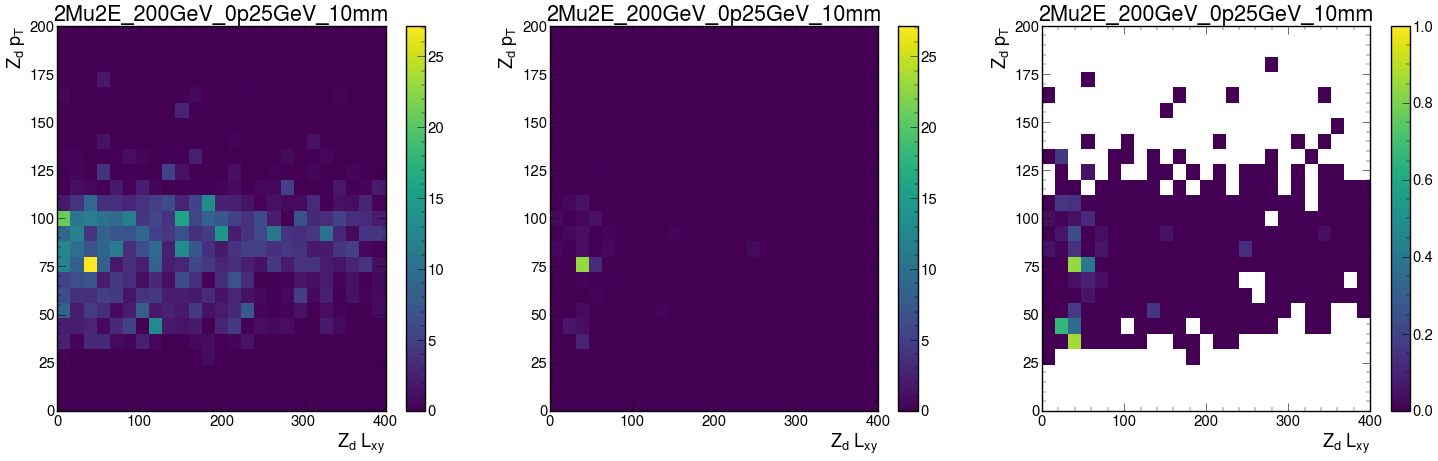

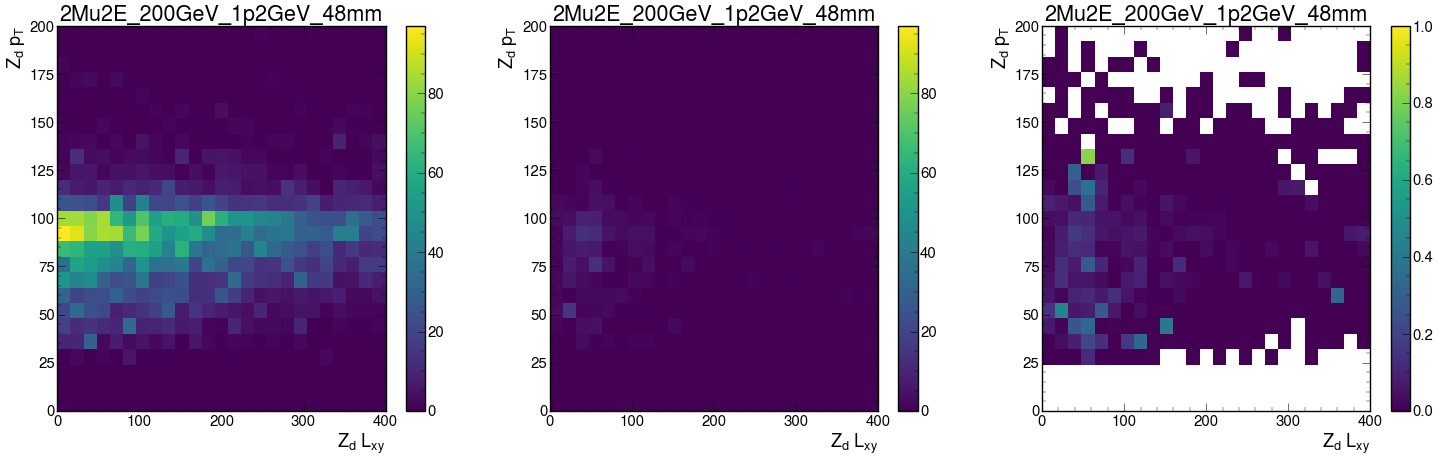

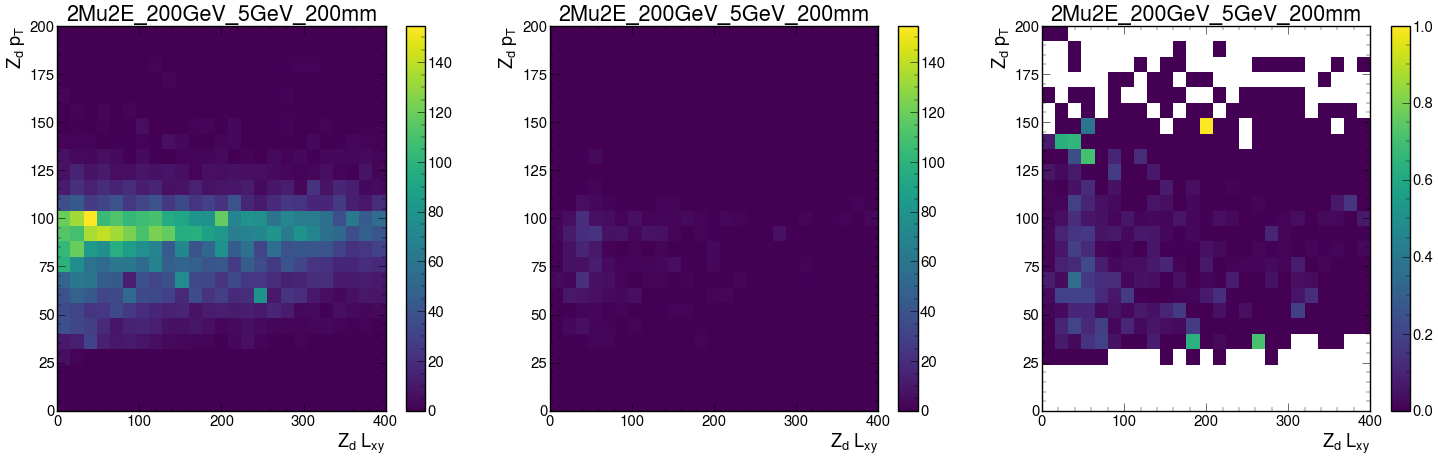

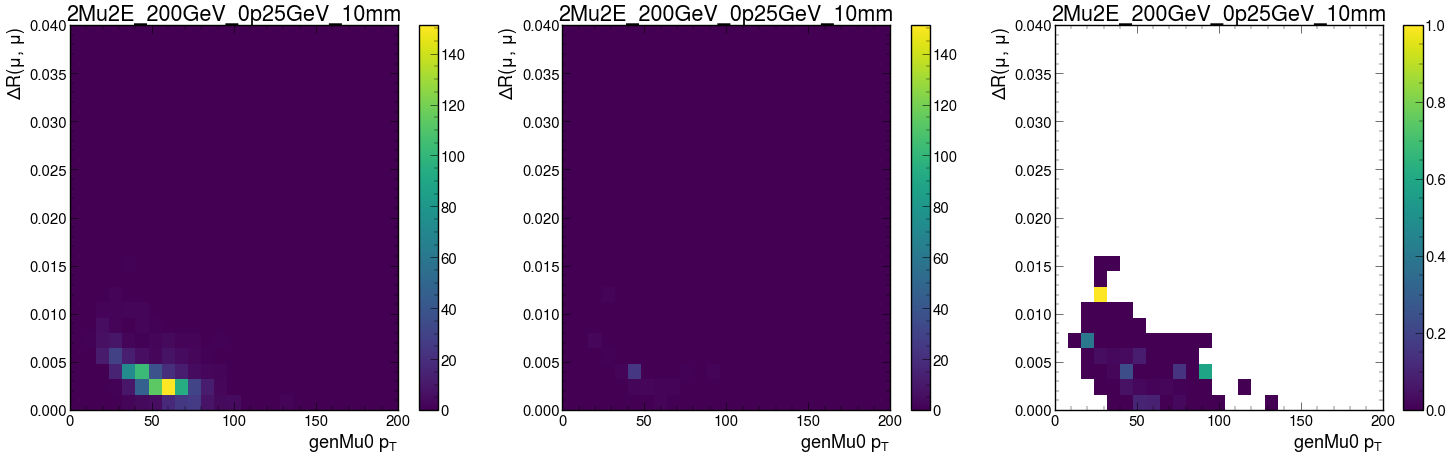

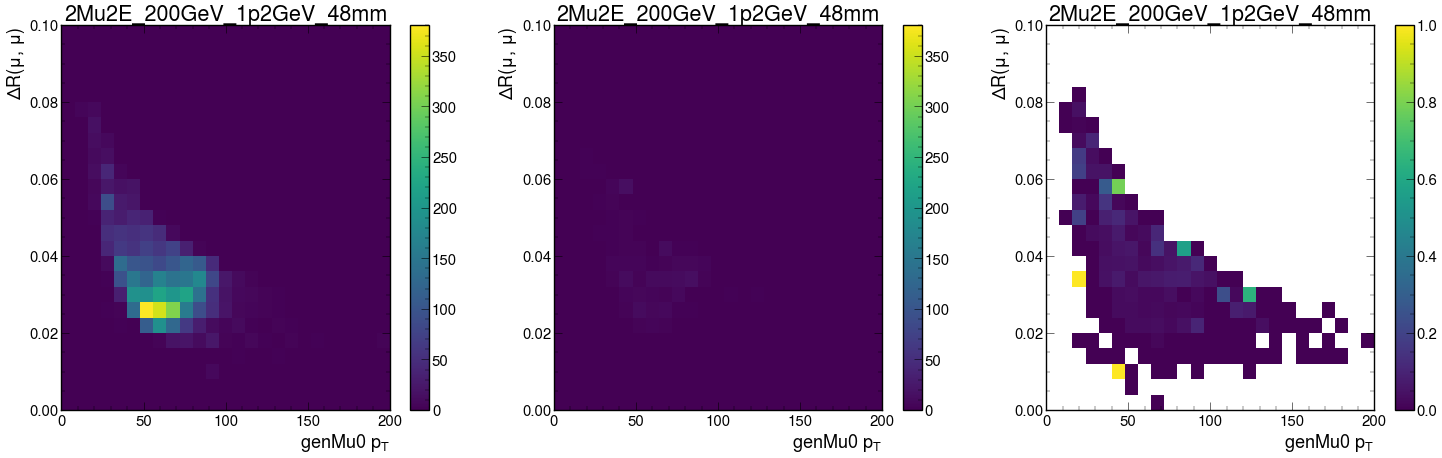

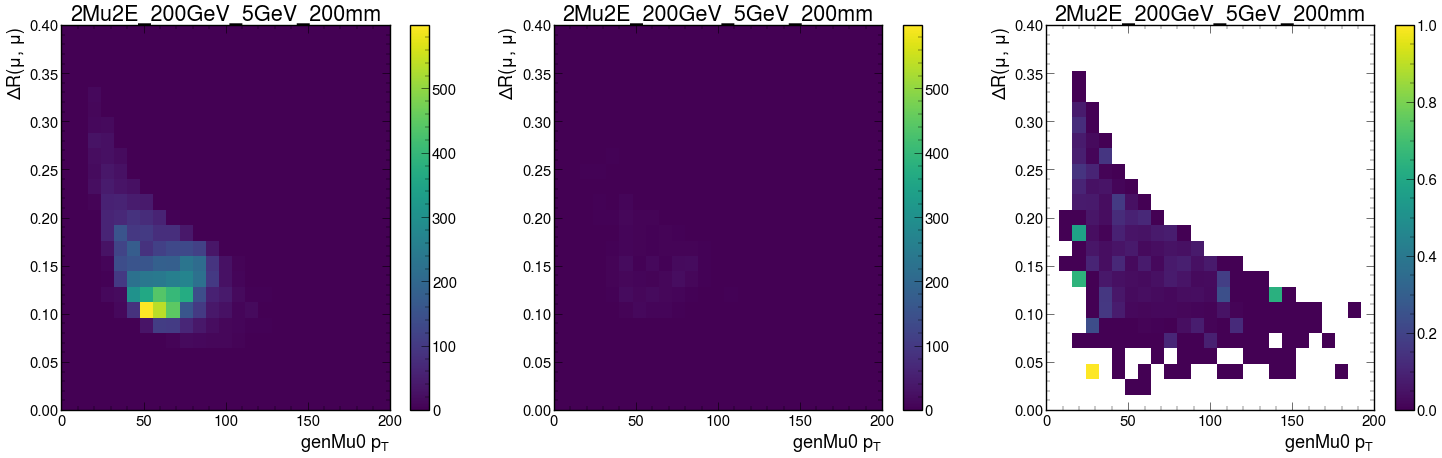

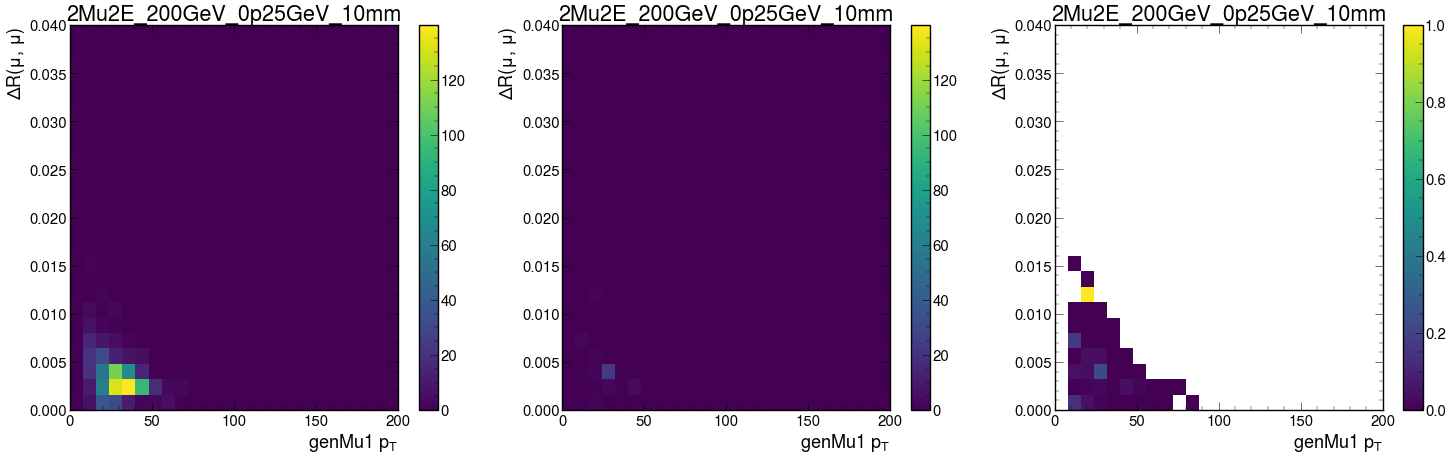

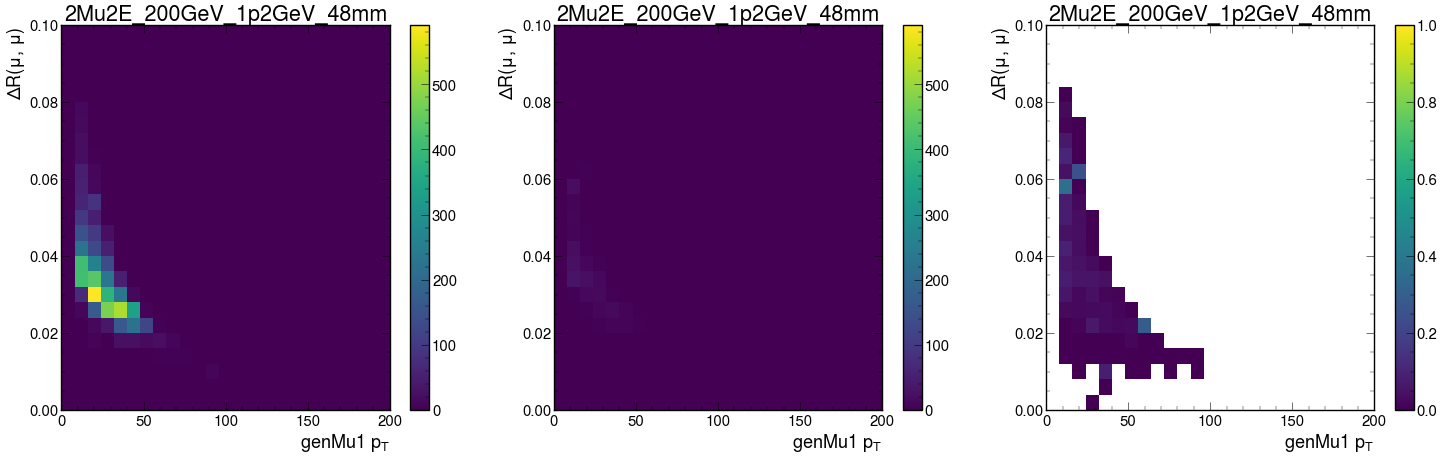

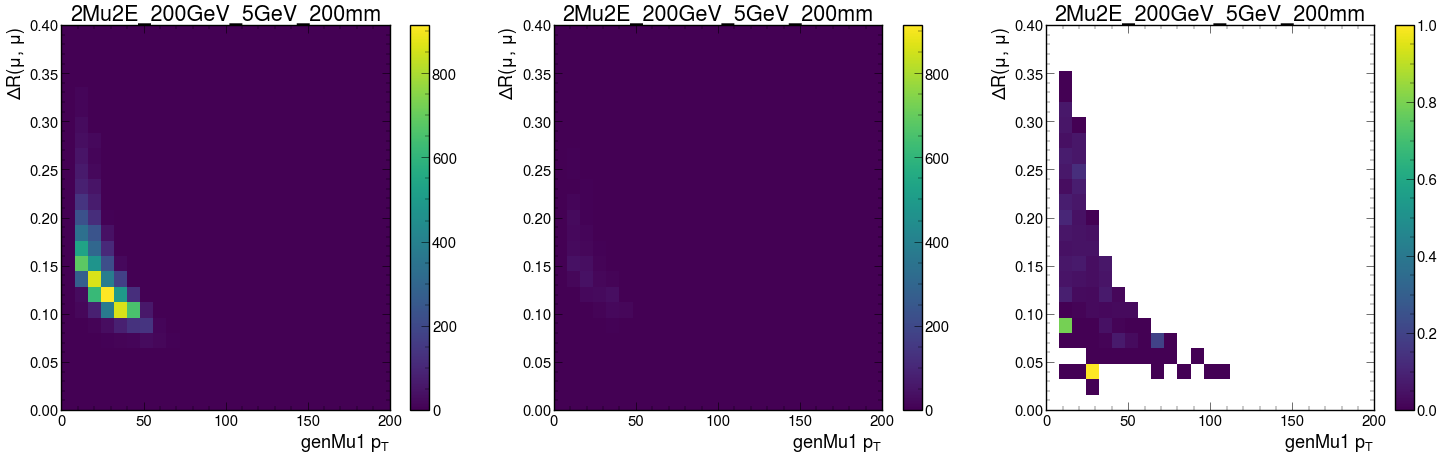

In [10]:
row = len(samples)
column = len(histograms[samples[0]])
#fig , ax = plt.subplots(row, column, figsize =(row *12, column*10)) 
for h in range(column):
    for s in range(row):
    
        
        hist2d_den = output["out"][samples[s]]["hists"][histograms[samples[s]][h]][ch1,:, :]
        hist2d_num = output["out"][samples[s]]["hists"][histograms[samples[s]][h]][ch4,:, :]
        
        values_den = hist2d_den.values()
        values_num = hist2d_num.values()
        values_ratio = values_num/(values_den)
        
        maximum = np.array(values_den).max()
        
        
        
        
        fig , ax =plt.subplots(1,3, figsize =(3*12, 10))
        plt.subplot(1, 3, 1)
        mesh_den=ax[0].pcolormesh(*hist2d_den.axes.edges.T,values_den.T, vmin=0,vmax = maximum) 
        fig.colorbar(mesh_den)
        
        plt.subplot(1, 3, 2)
        mesh_num=ax[1].pcolormesh(*hist2d_num.axes.edges.T,values_num.T, vmin=0,vmax=maximum) 
        fig.colorbar(mesh_num)
        
        
        plt.subplot(1, 3, 3)
        mesh = ax[2].pcolormesh(*hist2d_num.axes.edges.T, values_ratio.T, vmin = 0.0 , vmax = 1.0)
        fig.colorbar(mesh)
        for x in range(3):
            ax[x].set_xlabel(hist_x_axis[h])
            ax[x].set_ylabel(hist_y_axis[h])
            ax[x].set_title(samples[s])
            #ax[0].set_title(samples[s] + r"\\n$Z_d \rightarrow ee$")
            #ax[1].set_title(samples[s] + r"\\n$Z_d \rightarrow ee with $e\gamma$ LJ nearby$")
            #ax[0].text(0.5, 0.5,r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby")
            #ax[1].text(0.5, 0.5,r"$Z_d \rightarrow ee$ ")
        #plt.legend()
        
        